## IMPORT DATASET
>scipy.io can import .mat file ,so import this moduler

In [2]:
import scipy.io as scio
x = scio.loadmat('oil_data.mat')
y = scio.loadmat('oil_label.mat')

In [3]:
x,y = x['oil_raw_data'],y['data_label']

In [4]:
x,y = x.transpose(),y[:,1]

## preprocessing
> Minmax 

In [5]:
xmin,xmax = x.min(),x.max()
x=(x-xmin)/(xmax-xmin)

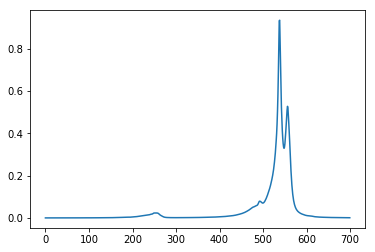

In [7]:
import matplotlib.pyplot as plt
plt.plot(x[2,:])
plt.show()

In [8]:
ymin,ymax = y.min(axis=0),y.max(axis=0)
y =  (y-ymin)/(ymax-ymin)

### train and test data set

In [9]:
x_train,x_test,y_train,y_test = x[:500],x[500:],y[:500],y[500:]

## BUILD MODEL

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

Using TensorFlow backend.


In [11]:
model = Sequential()
model.add(Dense(512,input_shape=(700,),name='layer1'))
model.add(Activation('tanh'))
# model.add(Dropout(0.5))

# model.add(Dense(256,name='layer2'))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1024,name='layer3'))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1024,name='layer4'))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(1,name='output'))
#model.add(Activation('tanh'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 512)               358912    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 513       
Total params: 359,425
Trainable params: 359,425
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras.optimizers import Adagrad
adam = Adagrad(lr=0.001, epsilon=1e-08, decay=0.0)
model.compile(loss='mean_squared_error',optimizer=adam)

## TRAINING

In [14]:
history = model.fit(x_train,y_train,epochs=1000,batch_size=100,shuffle=True,validation_split=0.2,\
                    verbose=0)

C:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


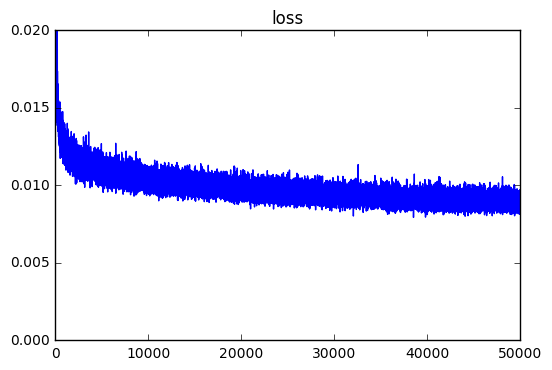

In [148]:
#print(history.history)  
loss = history.history['loss']
fig,ax = plt.subplots()
ax.plot(loss)
ax.set(ylim=[0,0.02])
plt.title('loss')
plt.show()

## PREDICTION

In [1]:
test_pre = model.predict(x_test)
train_pre = model.predict(x_train)

import numpy as np
sample_train,sample_test = len(train_pre),len(test_pre)
plt.plot(np.arange(sample_test),test_pre,'b--',np.arange(sample_test),y_test,'-r')
plt.show()
plt.plot(np.arange(sample_train),train_pre,'b--',np.arange(sample_train),y_train,'-g')
plt.show()

NameError: name 'model' is not defined

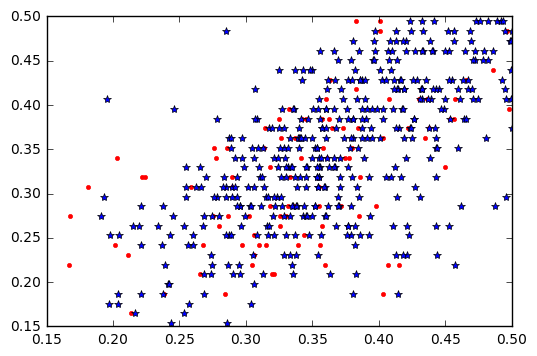

In [156]:
ax = plt.subplot()
ax.plot(test_pre,y_test,'.r')
ax.plot(train_pre,y_train,'*b')
ax.set_xlim([0.15,0.5])
ax.set_ylim([0.15,0.5])
plt.show()